# **IMPORTANDO BIBLIOTECAS**

In [ ]:
# Verificação de versão do Python
# Python ≥3.5 é necessário
import sys
assert sys.version_info >= (3, 5)

# Verificação de versão do Scikit-Learn
# Scikit-Learn ≥0.20 é necessário
import sklearn
assert sklearn.__version__ >= "0.20"

# Importações comuns
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import re
from itertools import combinations

# Configurações para plotar gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Importações para manipulação de dados e arquivos
import os
import requests
import zipfile
import pandas as pd

# Importações para modelagem e avaliação
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Importações para visualização de dados
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importações específicas para modelos de machine learning

# LightGBM
import lightgbm as lgb

# Ridge Regression
from sklearn.linear_model import Ridge

# Linear Regression
from sklearn.linear_model import LinearRegression

# Elastic Net
from sklearn.linear_model import ElasticNetCV

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Catboost
!pip install catboost
from catboost import CatBoostRegressor

# Support Vector Machine (SVM)
from sklearn.svm import SVR

# Ensemble Methods
from sklearn.ensemble import VotingRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


# **OBTENDO OS DADOS**

## Download do dataset

In [ ]:
url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"

# Faz o download do arquivo zip
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

csv_path = os.path.join(extract_path, "spotify_songs.csv")
songs = pd.read_csv(csv_path)

## Conferindo rapidamente o dataset

In [ ]:
print(songs.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
pd.set_option('display.max_rows', None)
songs["playlist_genre"].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

# **DEFINIÇÃO DAS FUNÇÕES**

##**Tratamento** dos dados

In [ ]:
# REMOÇÃO DE DUPLICATAS - remove músicas repetidas

def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    # Remove duplicadas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower'])
    return df_unique

In [ ]:
# REMOÇÃO DE COLUNAS

def removeColumns(df, columns_name):
    return df.drop(columns=columns_name)

In [ ]:
# REMOÇÃO DE LINHAS NaN (NOT A NUMBER)

def removeRowNaN(songs_cp):
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos

# REMOÇÃO DE LINHAS VAZIAS

def dropRowsEmpty(songs_cp):
    songs_cp_sem_nulos = removeRowNaN(songs_cp)
    valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
    songs_cp = songs_cp_sem_nulos
    return songs_cp


In [ ]:
# NORMALIZAÇÃO DE DADOS NUMÉRICOS

#Normaliza os dados numa escala de 0 a 1.
def normalizeColumns(df,columns_name):
    scaler = MinMaxScaler()
    df[columns_name] = scaler.fit_transform(df[columns_name])
    return df

In [ ]:
# ONEHOT para as variáveis categóricas que possuem um número pequeno de categorias.

def onehotEncode(df, columns):
    pd.get_dummies(df, columns=columns, prefix=columns)

In [ ]:
# PREENCHE MẼS DE LANÇAMENTO DAS MÚSICAS QUE NÃO POSSUEM ESSE DADO.

def fillMonths(songs: pd.DataFrame) -> pd.DataFrame:
    # Criar uma cópia do DataFrame para evitar modificar o original
    df = songs.copy()

    # Filtrar as linhas onde a data de lançamento tem apenas o ano (4 caracteres)
    df_ano_apenas = df[df['track_album_release_date'].str.len() == 4].copy()

    # Filtrar as linhas onde a data de lançamento tem o formato completo (ano-mês-dia)
    df_completo = df[df['track_album_release_date'].str.len() == 10].copy()

    # Extrair o mês das músicas com ano-mês-dia
    df_completo['month'] = df_completo['track_album_release_date'].str[5:7]

    # Contar a frequência de cada mês
    month_counts = df_completo['month'].value_counts()

    # Agora vamos preencher os meses nas músicas com ano apenas, de forma proporcional
    # Criação de uma lista que vai armazenar os meses a serem atribuídos
    months_to_fill = []

    # Para cada mês na distribuição, vamos adicionar o mês de forma proporcional
    for month, count in month_counts.items():
        months_to_fill.extend([month] * count)

    # Para as músicas faltando mês, vamos preencher com base na lista 'months_to_fill'
    df_ano_apenas['month'] = np.random.choice(months_to_fill, size=len(df_ano_apenas))

    # Agora vamos juntar os dois DataFrames (completo e preenchido) novamente
    # Garantindo que estamos mantendo todas as colunas, não apenas 'track_album_release_date'
    df_completo['month'] = df_completo['month']  # As músicas já completas não devem ser modificadas
    df_ano_apenas['track_album_release_date'] = df_ano_apenas['track_album_release_date'] + '-' + df_ano_apenas['month'] + '-01'

    # Substituir as linhas no DataFrame copiado
    df.update(df_completo)  # Atualiza as músicas completas
    df.update(df_ano_apenas)  # Atualiza as músicas com ano apenas

    # Retornar o DataFrame alterado
    return df

In [ ]:
# DECOMPÕE A COLUNA 'track_album_release_date' EM 'track_year' E 'track_month'.

def decompositionDateTransform(df, date_column):
    # Como o ano é composto de 4 dígitos, iremos extrair os 4 primeiros caracteres da coluna
    def get_year(date):
        if isinstance(date, str) and len(date) >= 4 and date[:4].isdigit():
            return int(date[:4])
        return None

    # Depois dos 4 caracteres teremos um '-' que faz a divisão do ano e mês, iremos fazer
    # split e pegaremos os dois próximos dígitos
    def get_month(date):
        if isinstance(date, str) and len(date) >= 7:
            parts = date.split('-')
            if len(parts) > 1 and parts[1].isdigit():
                return f"{int(parts[1]):02d}"  # Garantir dois dígitos no mês
        return None

    # Agora adicionamos as novas colunas
    df['track_year'] = df[date_column].apply(get_year)
    df['track_month'] = df[date_column].apply(get_month)
    return df

In [ ]:
# DECOMPÕE 'duration_ms' EM 'track_minutes' E 'track_seconds'.

def MilisecondsTransform(df, millis_column):
    def get_minutes(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            return millis // 60000
        return None

    def get_seconds(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            return (millis % 60000) // 1000
        return None

    df['track_minutes'] = df[millis_column].apply(get_minutes)
    df['track_seconds'] = df[millis_column].apply(get_seconds)
    return df

In [ ]:
# CLASSIFICA A COLUNA 'duration_ms' EM 0,1,2,3,4,5 e 6, NA COLUNA 'track_duration_classification'

def classifyDuration(df, millis_column):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes == 0:
                return 0
            elif duration_minutes <= 1:
                return 1
            elif duration_minutes <= 2:
                return 2
            elif duration_minutes <= 3:
                return 3
            elif duration_minutes <= 4:
                return 4
            elif duration_minutes <= 5:
                return 5
            else:
                return 6
        return None

    df['track_duration_classification'] = df[millis_column].apply(classify)
    return df

In [ ]:
# RETORNA OS DADOS DISCRETIZADOS E POSSÍVEIS OUTLIERS

def discretizeAndPossibleOutliers(data, n_bins=10, metodo='quantis'):
    if metodo == 'quantis':
        # Discretização baseada em quantis (divide os dados em n_bins intervalos com número igual de dados)
        bins = np.percentile(data, np.linspace(0, 100, n_bins+1))
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    elif metodo == 'igual':
        # Discretização por intervalos iguais (divide os dados em n_bins intervalos de tamanho igual)
        bins = np.linspace(data.min(), data.max(), n_bins+1)
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    else:
        raise ValueError("ERROR: 'quantis' ou 'igual'.")

    # Visualizar os dados discretizados
    sns.histplot(data_discretizada, kde=False, discrete=True, color='skyblue')
    plt.title('Distribuição dos Dados Discretizados')
    plt.xlabel('I')
    plt.ylabel('C')
    plt.show()

    # Identificar outliers (valores fora de 1.5 vezes o intervalo interquartil)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

    return data_discretizada, outliers

In [ ]:
# ONEHOT do gênero das músicas

def oneHotGenre(df):

  # Aplicar One-Hot Encoding e modificar os nomes das colunas
  one_hot = pd.get_dummies(df['playlist_genre'], prefix='track_genre')

  # Garantir que os valores sejam inteiros (0 ou 1)
  one_hot = one_hot.astype(int)

  # Concatenar o resultado no DataFrame original e remover a coluna original
  df = pd.concat([df, one_hot], axis=1).drop(columns=['playlist_genre'])

  return df


In [ ]:
# Calcula a popularidade cada artista (função do adrian)

def encodeArtistPopularity(train_df, val_df, target_column='track_popularity'):

    # Calcula a média da popularidade de cada artista no train_set
    artist_popularity = train_df.groupby('track_artist')[target_column].mean()

    # Calcula a média global de popularidade dos artistas do train_df
    global_mean_popularity = artist_popularity.mean()

    # Adiciona a nova coluna 'artist_popularity' no train_df
    train_df['artist_popularity'] = train_df['track_artist'].map(artist_popularity)

    # No val_df, se o artista existir no train_df, usamos a média; se não, usamos a média global
    val_df['artist_popularity'] = val_df['track_artist'].map(artist_popularity).fillna(global_mean_popularity)

    return val_df

In [ ]:
# Categoriza a coluna instrumentalness em binária (1 se > 0.6, senão 0), aplica one-hot encoding nos conjuntos de treino e teste, e retorna os DataFrames atualizados sem a coluna original.

def categorizeInstrumentalnessAndOneHot(train_df, test_df, instrumentalness_column='instrumentalness'):
    # Função para categorizar instrumentalness
    def categorize_instrumentalness(instrumentalness):
        return 1 if instrumentalness > 0.6 else 0  # 1 = instrumental, 0 = não instrumental

    # 1️⃣ Categoriza a variável 'instrumentalness'
    train_df['instrumentalness_categorized'] = train_df[instrumentalness_column].apply(categorize_instrumentalness)
    test_df['instrumentalness_categorized'] = test_df[instrumentalness_column].apply(categorize_instrumentalness)

    # 2️⃣ Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['instrumentalness_categorized']])
    instrumentalness_columns = encoder.get_feature_names_out(['instrumentalness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=instrumentalness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['instrumentalness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=instrumentalness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=instrumentalness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais (sem a coluna original 'instrumentalness')
    test_df = pd.concat([test_df.drop(columns=[instrumentalness_column, 'instrumentalness_categorized']), test_encoded_df], axis=1)

    return test_df

In [ ]:
# Categoriza a acousticnes como 0 = não é acustica, 1 = provavelmente é acustica, logo em seguida faz o onehot

def categorizeAcousticnessAndOneHot(train_df, test_df, acousticness_column='acousticness'):
    def categorize(acousticness):
        if acousticness > 0.7:
            return 1  # Acústico
        else:
            return 0  # Não acústico

    # 1️⃣ Categoriza o acousticness
    train_df['acousticness_categorized'] = train_df[acousticness_column].apply(categorize)
    test_df['acousticness_categorized'] = test_df[acousticness_column].apply(categorize)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['acousticness_categorized']])
    acousticness_columns = encoder.get_feature_names_out(['acousticness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=acousticness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['acousticness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=acousticness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=acousticness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    # 7️⃣ Remove a coluna categórica original
    train_df.drop(columns=['acousticness_categorized'], inplace=True)
    test_df.drop(columns=['acousticness_categorized'], inplace=True)

    test_df.drop(columns=[acousticness_column], inplace=True)

    return test_df

In [ ]:
# Categoriza a speechiness como 0 = somente musica, 1 = musica e fala, 2 = provavelmente é só fala, logo em seguida faz o onehot

def categorizeSpeechinessAndOneHot(train_df, test_df, speechiness_column='speechiness'):
    def categorize(speechiness):
        if speechiness <= 0.33:
            return 0  # Não-falado (somente música)
        elif speechiness <= 0.66:
            return 1  # Música e fala (misturado)
        else:
            return 2  # Exclusivamente falado

    # 1️⃣ Categoriza o speechiness
    train_df['speechiness_categorized'] = train_df[speechiness_column].apply(categorize)
    test_df['speechiness_categorized'] = test_df[speechiness_column].apply(categorize)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['speechiness_categorized']])
    speechiness_columns = encoder.get_feature_names_out(['speechiness_categorized'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=speechiness_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['speechiness_categorized']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=speechiness_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=speechiness_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    train_df = pd.concat([train_df, train_encoded_df], axis=1)
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    # 7️⃣ Remove a coluna categórica original
    train_df.drop(columns=['speechiness_categorized'], inplace=True)
    test_df.drop(columns=['speechiness_categorized'], inplace=True)

    test_df.drop(columns=[speechiness_column], inplace=True)

    return test_df

In [ ]:
# Categoriza a mode como 0 = modo 0 e 1 = modo 1, logo em seguida faz o onehot

def categorizeModeAndOneHot(train_df, test_df, mode_column='mode'):
    # Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplica OneHot na coluna 'mode'
    train_encoded = encoder.fit_transform(train_df[[mode_column]])
    mode_columns = encoder.get_feature_names_out([mode_column])
    train_encoded_df = pd.DataFrame(train_encoded, columns=mode_columns, index=train_df.index)

    test_encoded = encoder.transform(test_df[[mode_column]])
    test_encoded_df = pd.DataFrame(test_encoded, columns=mode_columns, index=test_df.index)

    # Junta os novos DataFrames com os originais
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    test_df.drop(columns=[mode_column], inplace=True)

    return test_df

In [ ]:
# Categoriza a key em categorias de 0 a 11 ou em no_key, logo em seguida faz o onehot

def categorizeKeyAndOneHot(train_df, test_df, key_column='key'):
    # Substitui o valor -1 por uma categoria extra chamada 'no_key'
    train_df['key'] = train_df[key_column].replace(-1, 'no_key')
    test_df['key'] = test_df[key_column].replace(-1, 'no_key')

    # Inicializa o OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplica OneHot na coluna 'key'
    train_encoded = encoder.fit_transform(train_df[['key']])
    key_columns = encoder.get_feature_names_out(['key'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=key_columns, index=train_df.index)

    test_encoded = encoder.transform(test_df[['key']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=key_columns, index=test_df.index)

    # Junta os novos DataFrames com os originais
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    test_df.drop(columns=[key_column], inplace=True)

    return test_df

In [ ]:
def padronizar_track_artist(df):
    def limpar_nome(nome):
        if not isinstance(nome, str):  # Verifica se é string
            return nome

        # Remove tudo após indicadores de colaboração (case insensitive)
        nome = re.split(r'\s+feat\..*|\(feat\..*|;.*|,.*|\s+ft\..*|\s+&.*|\s+com\..*', nome, flags=re.IGNORECASE)[0]

        # Remove conteúdo entre parênteses restantes (ex: "(Remix)")
        nome = re.sub(r'\(.*?\)', '', nome)

        # Remove espaços extras e padroniza capitalização
        nome = nome.strip().title()

        return nome

    # Aplica a função de limpeza e remove duplicados
    df['track_artist'] = df['track_artist'].apply(limpar_nome)

    return df


In [ ]:
def count_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values


In [ ]:
#Retorna o dataframe com o onehot de duration_ms
def classifyDurationAndOneHot(train_df, test_df, millis_column='duration_ms'):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes < 1:
                return 0
            elif duration_minutes <= 1.7:
                return 1
            elif duration_minutes <= 2.7:
                return 2
            elif duration_minutes <= 3.7:
                return 3
            elif duration_minutes <= 4.7:
                return 4
            elif duration_minutes <= 5.7:
                return 5
            elif duration_minutes <= 6.7:
                return 6
            else:
                return 7
        return None

    # 1️⃣ Classifica a duração
    train_df['track_duration_classification'] = train_df[millis_column].apply(classify)
    test_df['track_duration_classification'] = test_df[millis_column].apply(classify)

    # 2️⃣ Inicializa OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3️⃣ Aplica OneHot no treino
    train_encoded = encoder.fit_transform(train_df[['track_duration_classification']])
    duration_columns = encoder.get_feature_names_out(['track_duration_classification'])
    train_encoded_df = pd.DataFrame(train_encoded, columns=duration_columns, index=train_df.index)

    # 4️⃣ Aplica OneHot no teste
    test_encoded = encoder.transform(test_df[['track_duration_classification']])
    test_encoded_df = pd.DataFrame(test_encoded, columns=duration_columns, index=test_df.index)

    # 5️⃣ Assegura que o teste tenha as mesmas colunas do treino
    test_encoded_df = test_encoded_df.reindex(columns=duration_columns, fill_value=0)

    # 6️⃣ Junta os novos DataFrames com os originais
    test_df = pd.concat([test_df, test_encoded_df], axis=1)

    return test_df


In [ ]:
# Remove Zeros
def remove_zero_popularity(df: pd.DataFrame, column: str = 'track_popularity') -> pd.DataFrame:
    if column not in df.columns:
        raise ValueError(f"A coluna '{column}' não existe no DataFrame.")

    # Filtra linhas onde a popularidade não é zero (inteiro ou float)
    df_filtrado = df[np.isclose(df[column], 0) == False].copy()

    return df_filtrado

In [ ]:
def error_analisys(df, model, top_n=10):
    X_real, y_real = split_target_features(df)
    y_pred = model.predict(X_real)

    erros = np.abs(y_real - y_pred)
    resultados = pd.DataFrame({
        'Valor Real': y_real,
        'Valor Predito': y_pred,
        'Erro Absoluto': erros
    })

    maiores_erros = resultados.sort_values(by='Erro Absoluto', ascending=False).head(top_n)
    print(f"\n{top_n} Instâncias com maiores erros:")
    print(maiores_erros)

    return maiores_erros

## **Pré-processamento** dos dados

In [ ]:
# (FUNÇÃO PRINCIPAL) - Pré-processamento dos dados

def pre_process_data(df, train_df, conjunto):
  if(conjunto == 'general'):
    df = data_cleaning(df)
  elif(conjunto == 'train'):
    df = feature_selection(df)
    df = feature_engeneering(df, train_df)
    df = data_normalize(df)
    df = remove_columns_later(df)
    df = remove_zero_popularity(df)
  elif(conjunto == 'test' or conjunto == 'validation'):
    df = feature_selection(df)
    df = feature_engeneering(df, train_df)
    df = data_normalize(df)
    df = remove_columns_later(df)
    df = remove_zero_popularity(df)
  else:
    raise ValueError("ERROR: 'train', 'test' ou 'validation'.")

  return df


### Subfunções

In [ ]:
# Limpeza
def data_cleaning(df):
  #Removendo dados duplicados
  df = removeDuplicates(df)

  #Removendo linhas que possuem dados em branco e que não podem ser obtidos de forma ideal
  df = dropRowsEmpty(df)

  df = remove_zero_popularity(df)

  return df


In [ ]:
# Seleção de Características
def feature_selection(df):
  # Dropando colunas que representam id
  df = removeColumns(df,['track_id','track_album_id','playlist_id'])

  # Dropando colunas de nomes que não irão agregar na predição do modelo
  df = removeColumns(df,['track_name','track_album_name','playlist_name', 'playlist_subgenre'])

  return df

In [ ]:
# Engenharia de Atributos
def feature_engeneering(df, train_df):

  # Calcula popularidade do artista com base no conjunto de treino
  df = encodeArtistPopularity(train_df, df, target_column='track_popularity')

  #df = categorizeInstrumentalnessAndOneHot(train_df, df)

  #df = categorizeAcousticnessAndOneHot(train_df, df)

  #df = categorizeSpeechinessAndOneHot(train_df, df)

  #df = categorizeKeyAndOneHot(train_df, df)

  # Decompõe a coluna 'track_album_release_date' em 'track_year' e 'track_month'
  df = decompositionDateTransform(df,'track_album_release_date')

  # Transforma a coluna 'duration_ms' em 'track_minutes' e 'track_seconds'
  df = MilisecondsTransform(df,'duration_ms')

  # Categoriza as musicas por 'duration_ms' e cria a coluna 'track_duration_classification':
  df = classifyDuration(df,'duration_ms')

  df = classifyDurationAndOneHot(train_df, df, millis_column='duration_ms')

  df = remove_rows_with_value_1(df, column_name='track_duration_classification_0')

  # Realiza oneHot para o gênero das músicas
  df = oneHotGenre(df)

  return df

In [ ]:
# Normalização dos dados
def data_normalize(df):
    # Colocando colunas na mesma escala (normalização)
    normalizeColumns(df,['track_popularity','mode', 'acousticness', 'speechiness', 'key', 'danceability','energy','loudness','liveness','valence',
                        'tempo','track_minutes','track_seconds','track_year', 'track_duration_classification', 'artist_popularity'])

    return df

In [ ]:
# Remove as colunas não necessárias após o processamento

def remove_columns_later(dataset: pd.DataFrame) -> pd.DataFrame:

    # Cria uma cópia para não modificar o DataFrame original
    df = dataset.copy()

    # Lista para armazenar as colunas a serem removidas
    colunas_para_remover = ['track_artist', 'track_album_release_date', 'track_month']

    df = df.drop(columns=colunas_para_remover)
    print(f"Colunas removidas: {colunas_para_remover}")


    return df

In [ ]:
def remove_rows_with_value_1(df, column_name='track_duration_classification_0'):
    # Remove todas as linhas onde o valor da coluna especificada é igual a 1
    df_filtered = df[df[column_name] != 1].reset_index(drop=True)

    return df_filtered

## **Treinamento** e **Avaliação** dos Modelos

In [ ]:
# (SUBFUNÇÃO) - SEPARA AS FEATURES E O ATRIBUTO ALVO

def split_target_features(df):

  # X_feat: variáveis independentes
  X_feat = df.drop(columns=['track_popularity'])

  # y_feat: target
  y_feat = df['track_popularity']

  return X_feat, y_feat

In [ ]:
from operator import mod
# (FUNÇÃO GERAL) - TREINA O MODELO

def train_model(df, model_name, params):

  X_train, y_train = split_target_features(df)

  if model_name == 'lightgbm':
    model = lgb.LGBMRegressor(**params)
  elif model_name == 'ridge':
    model = Ridge(**params)
  elif model_name == 'linear_regression':
    model = LinearRegression(**params)
  elif model_name == 'svm':
    model = SVR(**params)
  elif model_name == 'elastic_net':
    model = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],  # Mistura entre L1 e L2 (0 = Ridge, 1 = Lasso)
    alphas=[0.001, 0.01, 0.1, 1, 10],
    cv=5
    )
  elif model_name == 'random_forest':
    model = RandomForestRegressor(**params)
  elif model_name == 'catboost':
    model = CatBoostRegressor(**params)
  else:
    raise ValueError("Modelo não suportado. Escolha entre 'lightgbm', 'ridge', 'linear_regression', 'svm' .")

  # Treinar o modelo
  model.fit(X_train, y_train)

  # Retornar o modelo treinado
  return model

In [ ]:
# (FUNÇÃO GERAL) - AVALIA E RETORNA A PERFORMANCE DO MODELO

def evaluate_model_performance(df, model):

  X_test, y_test = split_target_features(df)
  y_pred = model.predict(X_test)

  # MAE
  mae = mean_absolute_error(y_test, y_pred)

  # MSE
  mse = mean_squared_error(y_test, y_pred)

  # RMSE
  rmse = np.sqrt(mse)

  # R²
  r2 = r2_score(y_test, y_pred)

  # Exibindo os resultados
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"R²: {r2}")
  print("Predições do modelo: ")
  print(y_pred)

In [ ]:
# (FUNÇÃO GERAL) - EXIBE O GRÁFICO DE VALORES REAIS X VALORES PREVISTOS

def plot_predictions(df, model, ax=None):
    X, y_true = split_target_features(df)
    y_pred = model.predict(X)

    if ax is None:
        fig, ax = plt.subplots()  # Cria um novo gráfico se nenhum eixo for passado

    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.set_xlabel("Valores Reais")
    ax.set_ylabel("Valores Preditos")
    ax.set_title("Popularidade das Músicas")
    ax.set_title(f'Predições do {type(model).__name__}')

In [ ]:
# (FUNÇÃO GERAL) - FAZ A VALIDAÇÃO CRUZADA COM 10 FOLDS

def cross_validation(df, model):

    X, y = split_target_features(df)

    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)

    # Calcule o RMSE após a validação cruzada
    rmse_scores = np.sqrt(-scores)  # Convertendo de MSE negativo para RMSE

    print("Scores:", rmse_scores)  # Exibindo os scores (RMSE)
    print("Média:", rmse_scores.mean())  # Média dos RMSEs
    print("Desvio Padrão:", rmse_scores.std())  # Desvio padrão dos RMSEs


In [ ]:
# (SUBFUNÇÃO) - CALCULA IMPORTÂNCIA DAS VARIÁVEIS (LIGHTGBM)

def feature_importance_lightgbm(df, model):
    # Acessando a importância das características
    importances = model.booster_.feature_importance()

    # Verificando se o número de features no DataFrame é o mesmo que o número de importâncias
    feature_names = model.booster_.feature_name()

    if len(feature_names) != len(importances):
        print("Aviso: O número de features no DataFrame não corresponde ao número de importâncias.")
        return

    # Normalizando as importâncias para a escala de 0-1
    max_importance = max(importances)  # Encontrando o valor máximo de importância
    normalized_importances = [x / max_importance for x in importances]  # Normalizando

    # Criando um DataFrame com as features e suas importâncias normalizadas
    feature_importance = pd.DataFrame({
        'Feature': feature_names,  # As features do modelo
        'Importance': normalized_importances  # Importância normalizada
    })

    # Ordenando da mais importante para a menos importante
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    return feature_importance

In [ ]:
# (SUBFUNÇÃO) - CALCULA IMPORTÂNCIA DAS VARIÁVEIS (XGB)

def feature_importance_xgb(df, model):
    # Acessando a importância das características
    importances = model.feature_importances_

    # Garantindo que as features utilizadas no modelo sejam as mesmas do DataFrame
    feature_names = df.columns[:len(importances)]  # Pegando as primeiras colunas conforme o número de importâncias

    if len(feature_names) != len(importances):
        print(f"Aviso: O número de features no DataFrame ({len(feature_names)}) não corresponde ao número de importâncias ({len(importances)}).")
        return

    # Normalizando as importâncias para a escala de 0-1
    max_importance = max(importances)  # Encontrando o valor máximo de importância
    normalized_importances = [x / max_importance for x in importances]  # Normalizando

    # Criando um DataFrame com as features e suas importâncias normalizadas
    feature_importance = pd.DataFrame({
        'Feature': feature_names,  # As features do modelo
        'Importance': normalized_importances  # Importância normalizada
    })

    # Ordenando da mais importante para a menos importante
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    return feature_importance


In [ ]:
# Importância das variáveis - Linear Regression
def feature_importance_linear(df, model):
    X, _ = split_target_features(df)
    importance = np.abs(model.coef_)  # Coeficientes da regressão linear

    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    return feature_importance

In [ ]:
def feature_importance_svm(df, model):
    import shap

    X_train, _ = split_target_features(df) # Define X_train within the function
    # Criar um objeto SHAP para explicar o modelo usando model.predict
    explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer(X_train)

    # Criar dataframe com importâncias
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': np.abs(shap_values.values).mean(axis=0)
    }).sort_values(by='Importance', ascending=False)

    print(importance_df.head(20))  # Exibir as 20 mais importantes

In [ ]:
# (SUBFUNÇÃO) - CALCULA IMPORTÂNCIA DAS VARIÁVEIS (RIDGE)

def feature_importance_ridge(df, model):
    X, y = split_target_features(df)
    # Obtendo a importância das variáveis
    importance = np.abs(model.coef_)  # Pegamos o valor absoluto dos coeficientes

    # Criando um DataFrame para visualizar melhor
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance})

    # Ordenando da mais importante para a menos importante
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    return feature_importance

In [ ]:
# (FUNÇÃO GERAL) - CALCULA IMPORTÂNCIA DAS VARIÁVEIS

def feature_importance(df, model, model_label):
    if (model_label == 'lightgbm'):
      return feature_importance_lightgbm(df, model)
    elif (model_label == 'ridge'):
      return feature_importance_ridge(df, model)
    elif (model_label == 'linear_regression'):
      return feature_importance_linear(df, model)
    elif (model_label == 'svm'):
      return feature_importance_svm(df, model)
    else:
      print("Modelo não suportado. Escolha entre 'lightgbm', 'ridge', 'linear_regression', 'svm' .")

In [ ]:
# (FUNÇÃO GERAL) - EXIBE GRÁFICO DE DISTRIBUIÇÃO -> VALORES REAIS X VALORES PREVISTOS

def plot_distribution(df, model, ax=None):
    X_true, y_true = split_target_features(df)
    y_pred = model.predict(X_true)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Cria um novo gráfico se nenhum eixo for passado

    # Plotando os valores reais
    ax.hist(y_true, bins=50, alpha=0.5, label="Valores reais", color='blue', edgecolor='black', log=True)

    # Plotando as predições
    ax.hist(y_pred, bins=50, alpha=0.5, label="Predições", color='orange', edgecolor='black', log=True)

    ax.set_xlabel("Valores")
    ax.set_ylabel("Frequência")
    ax.set_title(f"Distribuição das predições e valores reais: {type(model).__name__}")
    ax.legend(loc="best")

In [ ]:
# (FUNÇÃO GERAL) - EXIBE GRÁFICO DE ERROS

def plot_error(df, model, ax=None):
    X_true, y_true = split_target_features(df)
    y_pred = model.predict(X_true)
    erros = np.array(y_true) - np.array(y_pred)

    # Se 'ax' não for passado, cria um novo eixo
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))  # Define o tamanho do gráfico

    # Plotando o histograma dos erros
    sns.histplot(erros, bins=30, kde=True, ax=ax)  # Agora o gráfico será exibido no eixo 'ax'

    ax.set_xlabel("Erro Residual")  # Nome do eixo X
    ax.set_ylabel("Frequência")  # Nome do eixo Y
    ax.set_title(f"Distribuição dos Erros do Modelo: {type(model).__name__}")  # Título do gráfico


In [ ]:
def otimizar_modelo(nome, modelo, df, cv=3, n_iter=10, scoring='neg_root_mean_squared_error', random_state=42):
    """
    Otimiza hiperparâmetros de um modelo usando RandomizedSearchCV com validação cruzada,
    utilizando RMSE como métrica de avaliação.

    Parâmetros:
        nome (str): Nome identificador do modelo. Deve ser uma das chaves:
                    'ridge', 'light', 'catboost', 'random_forest', 'linear_regression', 'elastic_model'.
        modelo: Instância do modelo (treinado com parâmetros default ou não).
        X_val: Conjunto de features do dataset de validação.
        y_val: Vetor de target do dataset de validação.
        cv (int): Número de folds da validação cruzada (default: 3).
        n_iter (int): Número de iterações da busca aleatória (default: 10).
        scoring (str): Scorer a ser utilizado (default: 'neg_root_mean_squared_error').
        random_state (int): Semente para reprodutibilidade (default: 42).

    Retorna:
        best_estimator_: Modelo com os melhores hiperparâmetros encontrados.
        best_params_: Dicionário com os melhores hiperparâmetros.
        best_rmse_: Valor do RMSE do melhor modelo (valor positivo).
    """

    X_val, y_val = split_target_features(df)

    # Grid de hiperparâmetros para cada modelo
    param_grids = {
        'ridge': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        },
        'light': {  # Modelos do LightGBM
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200, 500]
        },
        'catboost': {  # Modelos do CatBoost
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1],
            'iterations': [250, 500, 1000]
        },
        'random_forest': {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 10, 20, 30]
        },
        'linear_regression': {  # Poucos hiperparâmetros para regressão linear
            'fit_intercept': [True, False]
        },
        'elastic_model': {
            'alpha': [0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.5, 0.9]
        }
    }

    if nome not in param_grids:
        raise ValueError(f"O modelo '{nome}' não possui um grid de hiperparâmetros definido.")

    param_grid = param_grids[nome]

    # Cria o RandomizedSearchCV utilizando RMSE (negativo) como scoring
    search = RandomizedSearchCV(estimator=modelo,
                                param_distributions=param_grid,
                                n_iter=n_iter,
                                cv=cv,
                                scoring=scoring,
                                random_state=random_state,
                                n_jobs=-1)

    # Realiza a busca nos dados de validação
    search.fit(X_val, y_val)

    # Como o scoring é negativo, o melhor score retornado é negativo; convertemos para RMSE positivo
    best_rmse = -search.best_score_

    return search.best_estimator_, search.best_params_, best_rmse

## Gráficos

In [ ]:
def plot_scatter(df, model):
    """Gráfico de Dispersão das predições vs valores reais"""
    X_true, y_true = split_target_features(df)
    y_pred = model.predict(X_true)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='green', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2, linestyle='--')
    plt.title('Predições vs Valores Reais')
    plt.xlabel('Valores Reais')
    plt.ylabel('Predições')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_distributionA(df, model):
    """Gráfico de Distribuição dos valores reais e predições"""
    X_true, y_true = split_target_features(df)
    y_pred = model.predict(X_true)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_true, color='green', fill=True, label='Valores Reais')
    sns.kdeplot(y_pred, color='blue', fill=True, label='Predições')
    plt.title('Distribuição dos Valores Reais e Predições')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

In [ ]:
def plot_histogram(df, model):
    """Histograma comparando valores reais e predições"""
    X_true, y_true = split_target_features(df)
    y_pred = model.predict(X_true)
    plt.figure(figsize=(10, 6))
    plt.hist(y_true, bins=30, alpha=0.5, label='Valores Reais', color='green')
    plt.hist(y_pred, bins=30, alpha=0.5, label='Predições', color='blue')
    plt.title('Histograma dos Valores Reais e Predições')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

# **PARTICIONAMENTO DOS DADOS**

## Limpando dataset geral antes da divisão.

In [ ]:
# Limpando dataset geral antes da divisão
songs = pre_process_data(songs, '', 'general')

## Separando conjuntos de: **TREINO**, **VALIDAÇÃO** e **TESTE**.

In [ ]:
#to make this notebook's output identical at every run
np.random.seed(42)

# 70% treino, 30% temporário (dividido em validação e teste)
train_set, temp_set = train_test_split(songs, test_size=0.3, random_state=42)

# 50% de 30% para validação e 50% para teste (ou seja, 15% validação e 15% teste)
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

print(f"Tamanho do conjunto de treino: {len(train_set)}")
print(f"Tamanho do conjunto de validação: {len(validation_set)}")
print(f"Tamanho do conjunto de teste: {len(test_set)}")

Tamanho do conjunto de treino: 16662
Tamanho do conjunto de validação: 3570
Tamanho do conjunto de teste: 3571


## Criando cópia do conjunto de treino e validação para exploração

In [ ]:
train_set_cp = train_set.copy()
validation_set_cp = validation_set.copy()

# **PRÉ-PROCESSAMENTO DOS DADOS**

In [ ]:
# CONJUNTO DE TREINO
train_set_cp = pre_process_data(train_set_cp, songs, 'train')

# CONJUNTO DE VALIDAÇÃO
validation_set_cp = pre_process_data(validation_set_cp, songs, 'validation')

# CONJUNTO DE TESTE
test_set = pre_process_data(test_set, songs, 'test')

Colunas removidas: ['track_artist', 'track_album_release_date', 'track_month']
Colunas removidas: ['track_artist', 'track_album_release_date', 'track_month']
Colunas removidas: ['track_artist', 'track_album_release_date', 'track_month']


# **TREINANDO MODELOS**

In [ ]:
#Parâmetros vazios (DEFAULT)
params = {}

# Evita mensagens desnecessárias durante o treino
params_lightgbm = {'verbose': -1}

# Evita mensagens desnecessárias durante o treino
params_catboost = {'verbose': False}

In [ ]:
# LIGHTGBM
LightGBM_model = train_model(train_set_cp, 'lightgbm', params_lightgbm)

In [ ]:
# RIDGE MODEL
Ridge_model = train_model(train_set_cp, 'ridge', params)

In [ ]:
# LINEAR REGRESSION
LinearRegression_model = train_model(train_set_cp, 'linear_regression', params)

In [ ]:
# ELASTIC NET
Elastic_net_model = train_model(train_set_cp, 'elastic_net', params)

In [ ]:
# RANDOM FOREST
RandomForest_model = train_model(train_set_cp, 'random_forest', params)

In [ ]:
# CatBoost
CatBoost_model = train_model(train_set_cp, 'catboost', params_catboost)

# **AVALIANDO MODELOS**

## LightGBM

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, LightGBM_model)

MAE: 0.10224339445175118
MSE: 0.019806019957687087
RMSE: 0.1407338621572189
R²: 0.5413223481283882
Predições do modelo: 
[0.77998296 0.35541887 0.54276205 ... 0.33104516 0.50193904 0.47935774]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, LightGBM_model)

Scores: [0.12133315 0.13332734 0.12348537 0.13477929 0.13616013 0.1339312
 0.14317227 0.13070241 0.12843018 0.13673881]
Média: 0.13220601551171424
Desvio Padrão: 0.0061488371309578365


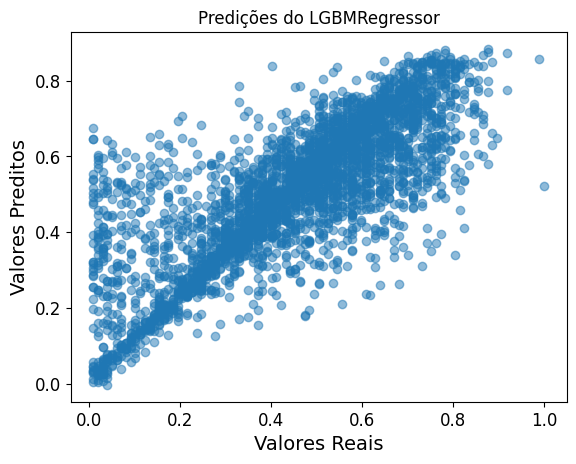

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, LightGBM_model)

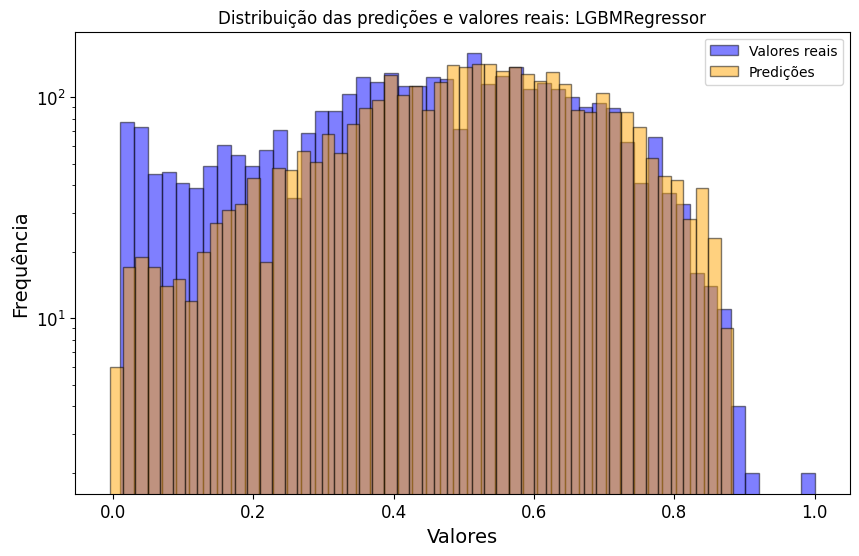

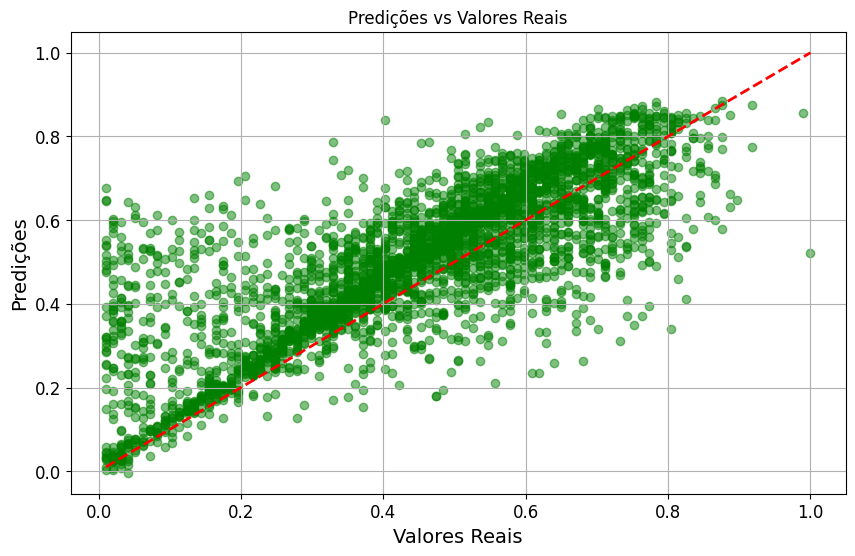

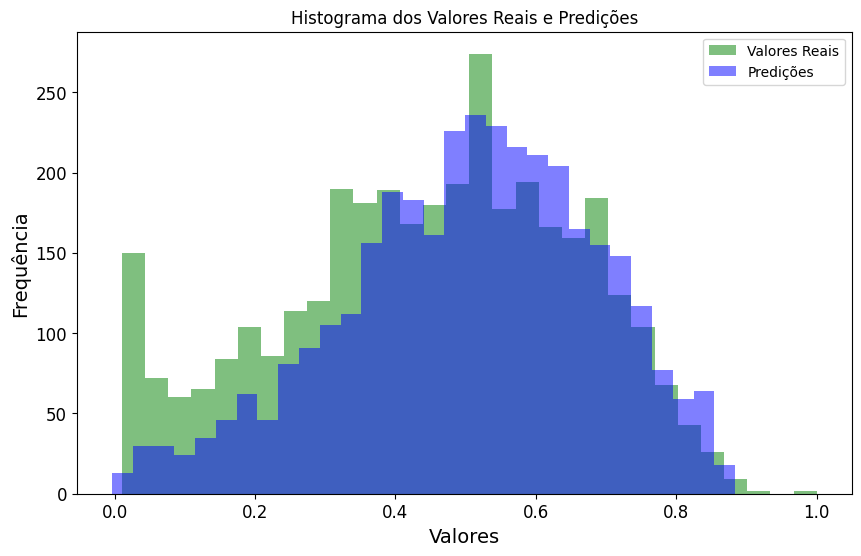

In [ ]:
plot_distribution(validation_set_cp, LightGBM_model)

plot_scatter(validation_set_cp, LightGBM_model)

plot_histogram(validation_set_cp, LightGBM_model)

In [ ]:
error_analisys(validation_set_cp, LightGBM_model, top_n=10)


10 Instâncias com maiores erros:
      Valor Real  Valor Predito  Erro Absoluto
1712    0.010309       0.675935       0.665626
2326    0.010309       0.646961       0.636652
1303    0.010309       0.644850       0.634540
2534    0.041237       0.642416       0.601179
3406    0.020619       0.603109       0.582490
3045    0.051546       0.631453       0.579906
1818    0.020619       0.598932       0.578313
1833    0.020619       0.590321       0.569703
3414    0.030928       0.596464       0.565536
2838    0.020619       0.580297       0.559678


Valor Real  Valor Predito  Erro Absoluto
1712    0.010309       0.675935       0.665626
2326    0.010309       0.646961       0.636652
1303    0.010309       0.644850       0.634540
2534    0.041237       0.642416       0.601179
3406    0.020619       0.603109       0.582490
3045    0.051546       0.631453       0.579906
1818    0.020619       0.598932       0.578313
1833    0.020619       0.590321       0.569703
3414    0.030928       0.596464       0.565536
2838    0.020619       0.580297       0.559678

## Ridge


In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, Ridge_model)

MAE: 0.10113844957753335
MSE: 0.01976827051999549
RMSE: 0.14059968179194252
R²: 0.5421965683642986
Predições do modelo: 
[0.78618107 0.41589298 0.50062038 ... 0.31331932 0.53870429 0.45869966]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, Ridge_model)

Scores: [0.12045551 0.12638581 0.12089978 0.13083972 0.13276507 0.13182775
 0.13642008 0.12518611 0.12307958 0.12910753]
Média: 0.1276966951204498
Desvio Padrão: 0.005086182713647866


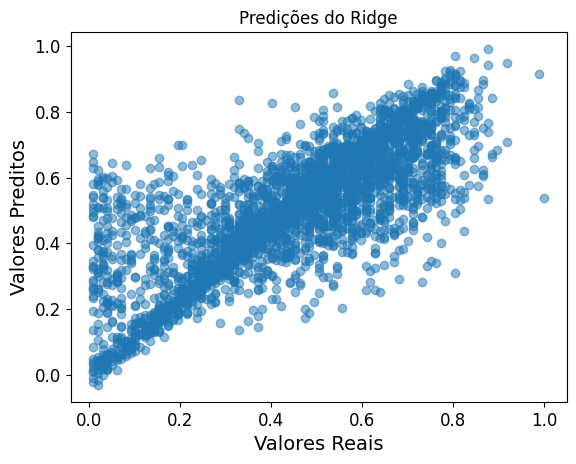

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, Ridge_model)

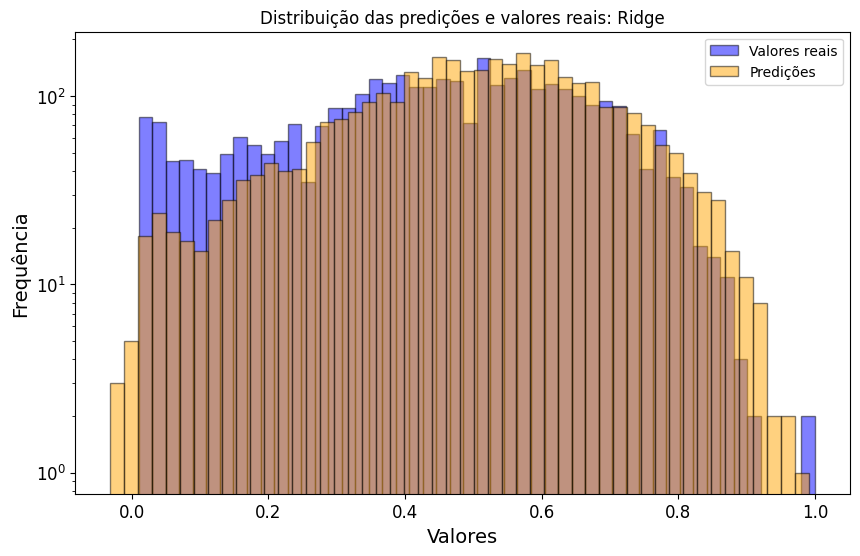

In [ ]:
plot_distribution(validation_set_cp, Ridge_model)

In [ ]:
feature_importance(train_set_cp, Ridge_model, 'ridge')

Feature    Importance
12                artist_popularity  9.511098e-01
3                          loudness  1.272538e-01
1                            energy  4.150582e-02
0                      danceability  3.127797e-02
13                       track_year  3.006092e-02
27                  track_genre_pop  2.446796e-02
18  track_duration_classification_1  2.299396e-02
16    track_duration_classification  1.707701e-02
25                  track_genre_edm  1.566765e-02
24  track_duration_classification_7  1.373391e-02
14                    track_minutes  8.978632e-03
8                          liveness  8.512852e-03
19  track_duration_classification_2  6.579126e-03
28                  track_genre_r&b  6.551078e-03
5                       speechiness  5.595300e-03
10                            tempo  5.408001e-03
30                 track_genre_rock  3.895096e-03
26                track_genre_latin  3.714976e-03
23  track_duration_classification_6  3.671174e-03
6                      acousticness  2.749801e-03
29                  track_genre_rap  2.429354e-03
7                  instrumentalness  2.271584e-03
15                    track_seconds  1.434256e-03
9                           valence  1.405504e-03
22  track_duration_classification_5  1.036409e-03
20  track_duration_classification_3  8.692256e-04
21  track_duration_classification_4  8.230695e-04
4                              mode  4.289719e-04
2                               key  3.625083e-04
11                      duration_ms  7.483856e-08
17  track_duration_classification_0  0.000000e+00

## Linear Regression

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, LinearRegression_model)

MAE: 0.10110256072068546
MSE: 0.019773528674781937
RMSE: 0.140618379576718
R²: 0.5420747974029556
Predições do modelo: 
[0.78775601 0.41643792 0.49974124 ... 0.31094912 0.53801367 0.45797539]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, LinearRegression_model)

Scores: [0.12048407 0.12642551 0.12091482 0.13094931 0.13286933 0.1320518
 0.13643129 0.12520875 0.12299102 0.12914712]
Média: 0.1277473023142181
Desvio Padrão: 0.005124830660277081


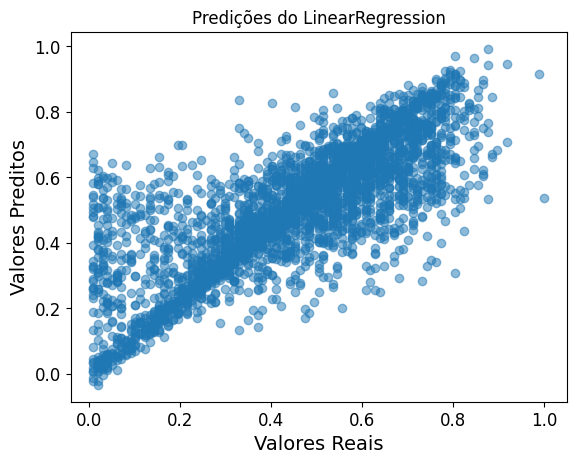

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, LinearRegression_model)

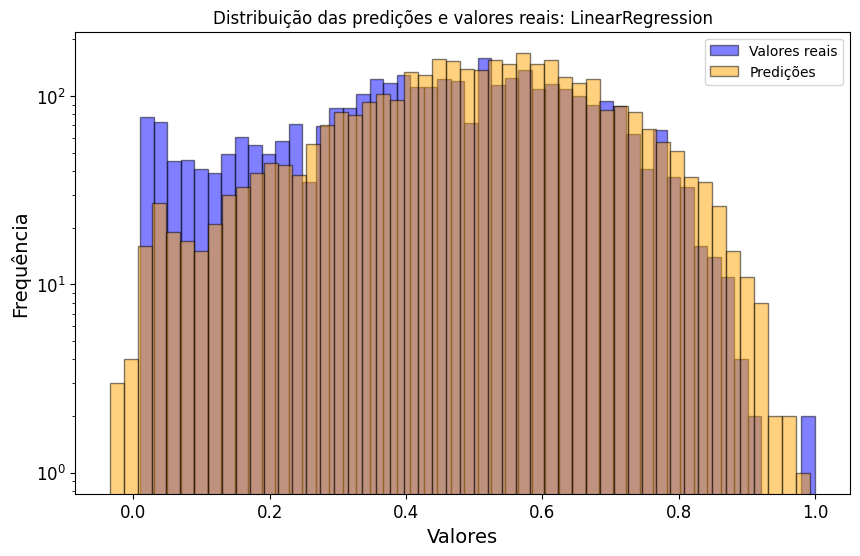

In [ ]:
plot_distribution(validation_set_cp, LinearRegression_model)

## Elastic Net

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, Elastic_net_model)

MAE: 0.10344296962584379
MSE: 0.02000089595840252
RMSE: 0.14142452389314422
R²: 0.5368093128691465
Predições do modelo: 
[0.78066063 0.42162094 0.50170567 ... 0.33377649 0.53982582 0.46121962]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, Elastic_net_model)

Scores: [0.12069972 0.12640019 0.12114467 0.13179151 0.13260083 0.13133045
 0.13639728 0.12605743 0.12312679 0.1290147 ]
Média: 0.12785635580337354
Desvio Padrão: 0.004983405982039795


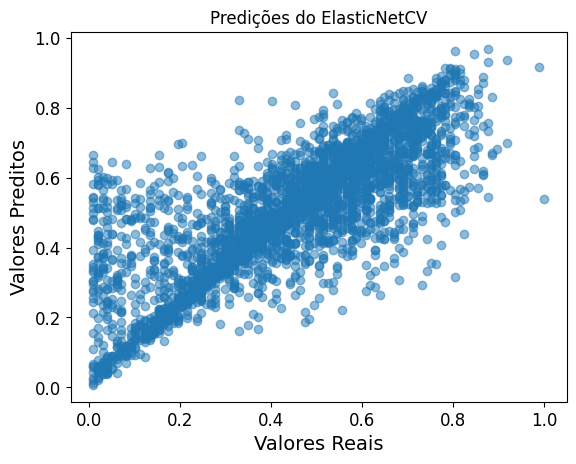

In [ ]:
plot_predictions(validation_set_cp, Elastic_net_model)

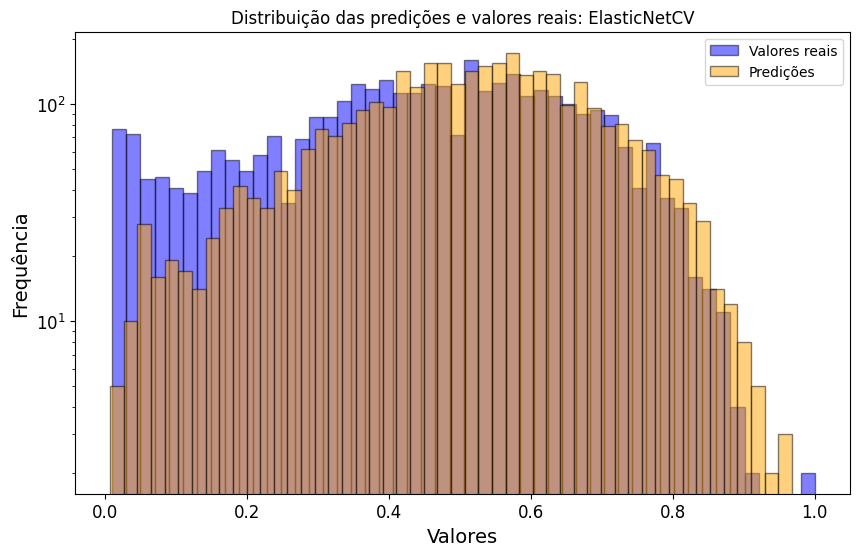

In [ ]:
plot_distribution(validation_set_cp, Elastic_net_model)

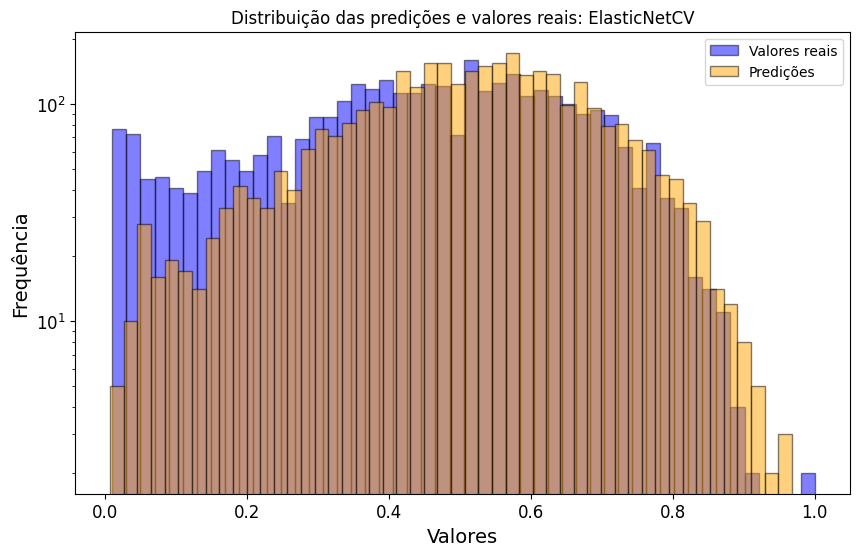

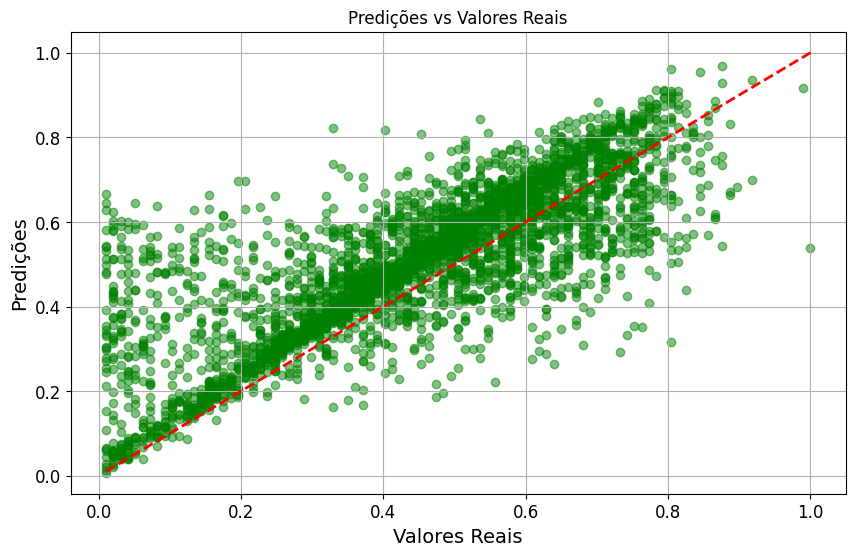

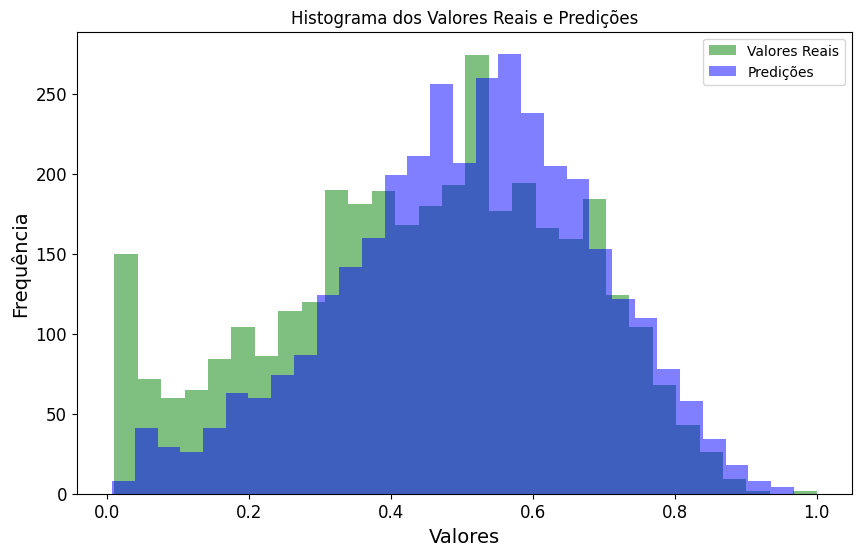

In [ ]:
plot_distribution(validation_set_cp, Elastic_net_model)

plot_scatter(validation_set_cp, Elastic_net_model)

plot_histogram(validation_set_cp, Elastic_net_model)

## Random Forest


In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(train_set_cp, RandomForest_model)

MAE: 0.03256743416782182
MSE: 0.002483946965632443
RMSE: 0.049839211125703456
R²: 0.9402859046045877
Predições do modelo: 
[0.13443299 0.27092784 0.19371134 ... 0.28298969 0.47690722 0.40608247]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, RandomForest_model)

Scores: [0.12190488 0.13306678 0.12483183 0.13597606 0.13484437 0.13463102
 0.14220372 0.12808535 0.12784225 0.13078238]
Média: 0.13141686442709433
Desvio Padrão: 0.0056574137236263915


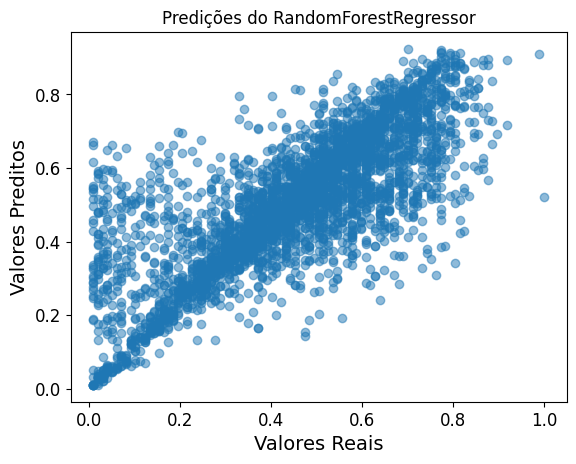

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, RandomForest_model)

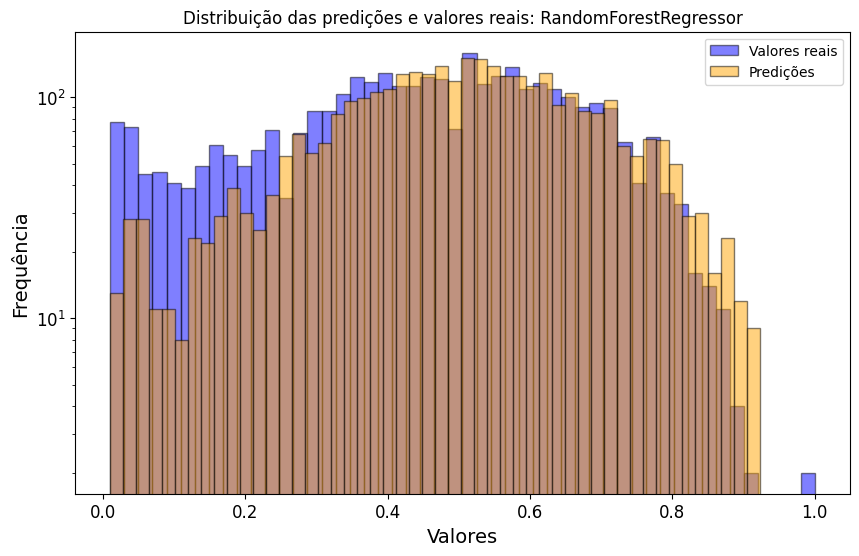

In [ ]:
plot_distribution(validation_set_cp, RandomForest_model)

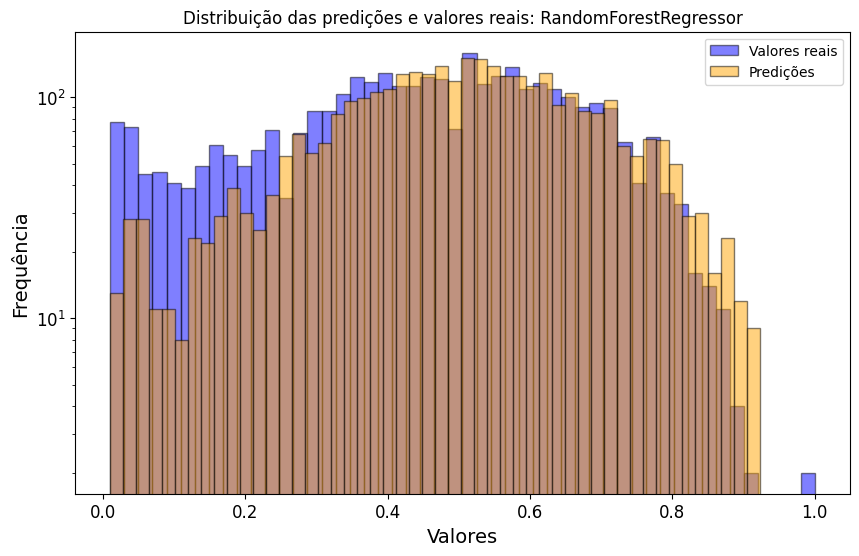

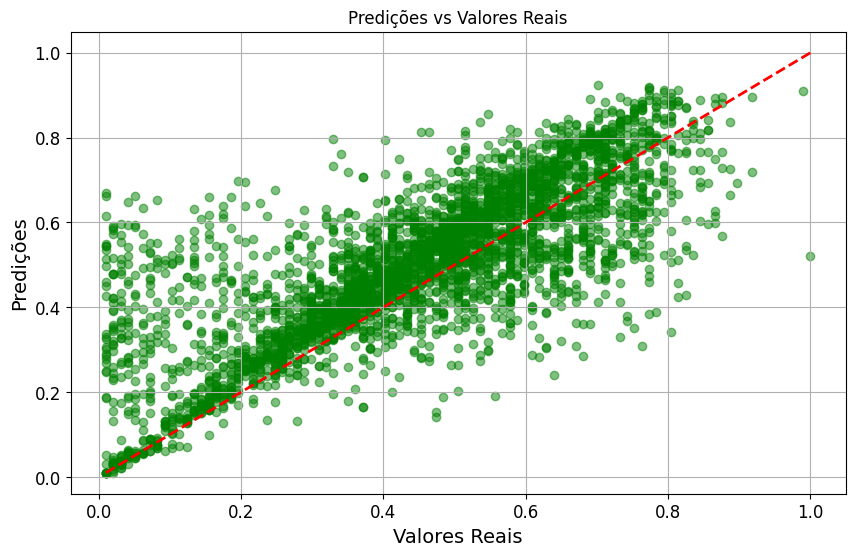

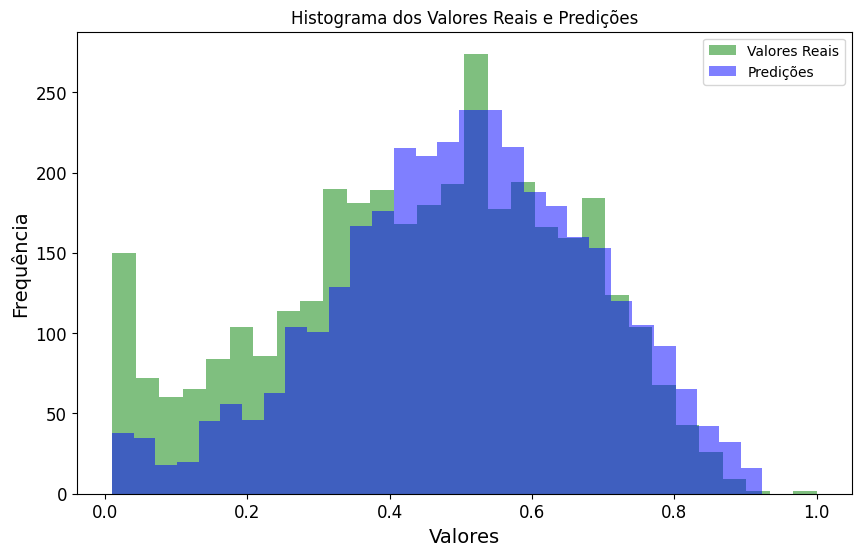

In [ ]:
plot_distribution(validation_set_cp, RandomForest_model)

plot_scatter(validation_set_cp, RandomForest_model)

plot_histogram(validation_set_cp, RandomForest_model)

## CatBooster

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, CatBoost_model)

MAE: 0.0995073170586845
MSE: 0.01944895992992246
RMSE: 0.13945952792807834
R²: 0.5495913216759346
Predições do modelo: 
[0.78920402 0.38193142 0.55829965 ... 0.32732723 0.42089642 0.4374075 ]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, CatBoost_model)

Scores: [0.12041546 0.13467391 0.12796363 0.13469547 0.13779817 0.13692677
 0.14161934 0.12906093 0.12469672 0.135968  ]
Média: 0.1323818413314069
Desvio Padrão: 0.006257760661518041


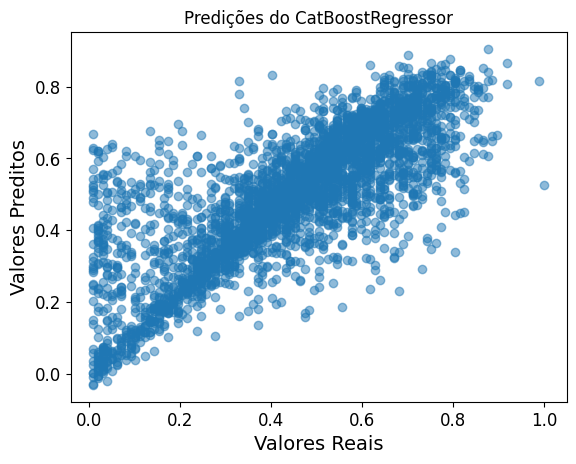

In [ ]:
plot_predictions(validation_set_cp, CatBoost_model)

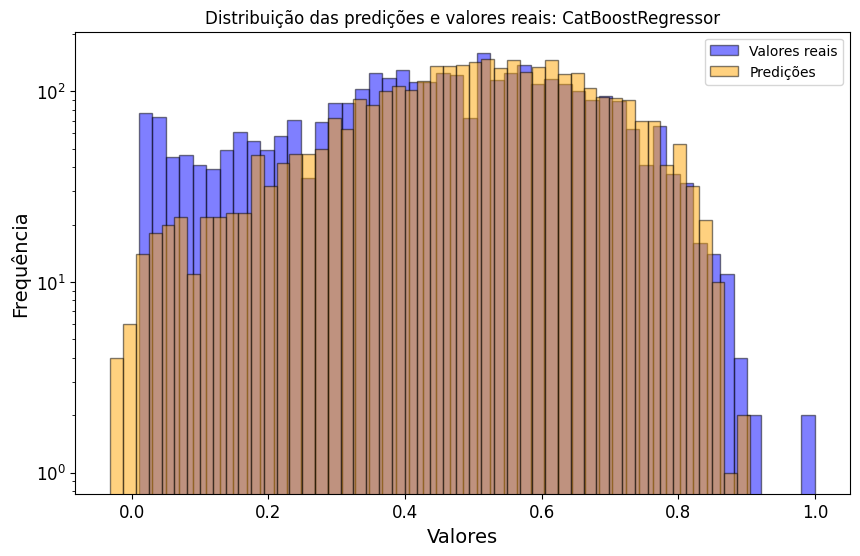

In [ ]:
plot_distribution(validation_set_cp, CatBoost_model)

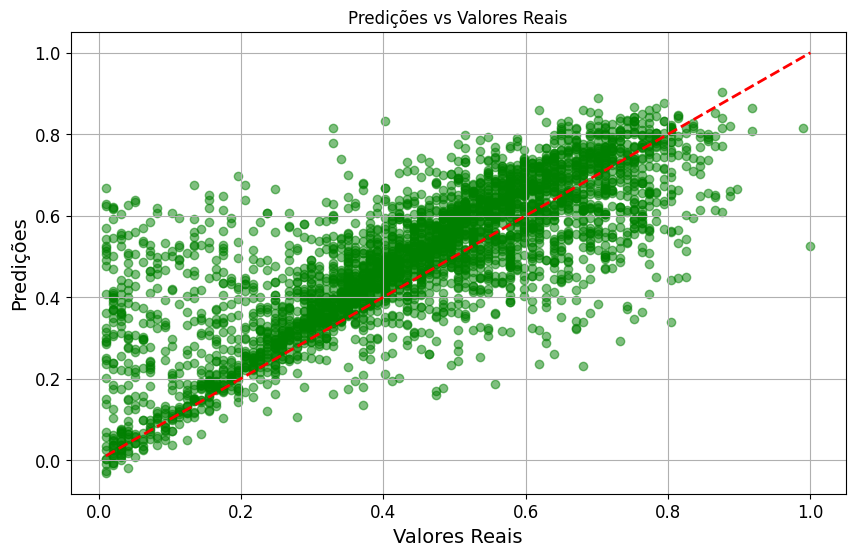

In [ ]:
plot_scatter(validation_set_cp, CatBoost_model)

# **AJUSTANDO HIPERPARÂMETROS**

In [ ]:
# LIGHTGBM
otimizar_modelo('light', LightGBM_model, validation_set_cp)


(LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=100, verbose=-1),
 {'num_leaves': 100, 'n_estimators': 500, 'learning_rate': 0.01},
 0.1329666896168519)

In [ ]:
# RIDGE
otimizar_modelo('ridge', Ridge_model, validation_set_cp)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


(Ridge(alpha=0.1), {'alpha': 0.1}, 0.1278130696077204)

In [ ]:
# LINEAR REGRESSION
otimizar_modelo('linear_regression', LinearRegression_model, validation_set_cp)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


(LinearRegression(fit_intercept=False),
 {'fit_intercept': False},
 0.12790484925404003)

In [ ]:
# CATBOOST
otimizar_modelo('catboost', CatBoost_model, validation_set_cp)

(<catboost.core.CatBoostRegressor at 0x7e38d6530c90>,
 {'learning_rate': 0.01, 'iterations': 500, 'depth': 6},
 0.12875007102217959)

In [ ]:
# RANDOM FOREST
otimizar_modelo('random_forest', RandomForest_model, validation_set_cp)

(RandomForestRegressor(max_depth=10, n_estimators=200),
 {'n_estimators': 200, 'max_depth': 10},
 0.1302720309314375)

# **TREINANDO MODELOS COM HIPERPARÂMETROS AJUSTADOS**

In [ ]:
# Parâmetros LIGHTGBM
params_lgbm = {'verbose':-1,'num_leaves': 31, 'n_estimators': 100, 'learning_rate': 0.1}

# Parâmetros RIDGE
params_ridge = {'alpha': 0.1}

# Parâmetros LINEAR REGRESSION
params_linear_reg = {'fit_intercept': False}

# Parâmetros RANDOM FOREST
params_random_forest = {'n_estimators': 500, 'max_depth': 10}

# Parâmetros CATBOOST
params_catboost = {'verbose':False, 'learning_rate': 0.01, 'iterations': 500, 'depth': 6}

In [ ]:
# LIGHTGBM
LightGBM_model = train_model(train_set_cp, 'lightgbm', params_lgbm)

In [ ]:
# RIDGE MODEL
Ridge_model = train_model(train_set_cp, 'ridge', params_ridge)

In [ ]:
# LINEAR REGRESSION
LinearRegression_model = train_model(train_set_cp, 'linear_regression', params_linear_reg)

In [ ]:
# RANDOM FOREST
RandomForest_model = train_model(train_set_cp, 'random_forest', params_random_forest)

In [ ]:
# CatBoost
CatBoost_model = train_model(train_set_cp, 'catboost', params_catboost)

# **AVALIANDO MODELOS APÓS AJUSTE DE HIPERPARÂMETROS**

## LightGBM

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, LightGBM_model)

MAE: 0.10224339445175118
MSE: 0.019806019957687087
RMSE: 0.1407338621572189
R²: 0.5413223481283882
Predições do modelo: 
[0.77998296 0.35541887 0.54276205 ... 0.33104516 0.50193904 0.47935774]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, LightGBM_model)

Scores: [0.12133315 0.13332734 0.12348537 0.13477929 0.13616013 0.1339312
 0.14317227 0.13070241 0.12843018 0.13673881]
Média: 0.13220601551171424
Desvio Padrão: 0.0061488371309578365


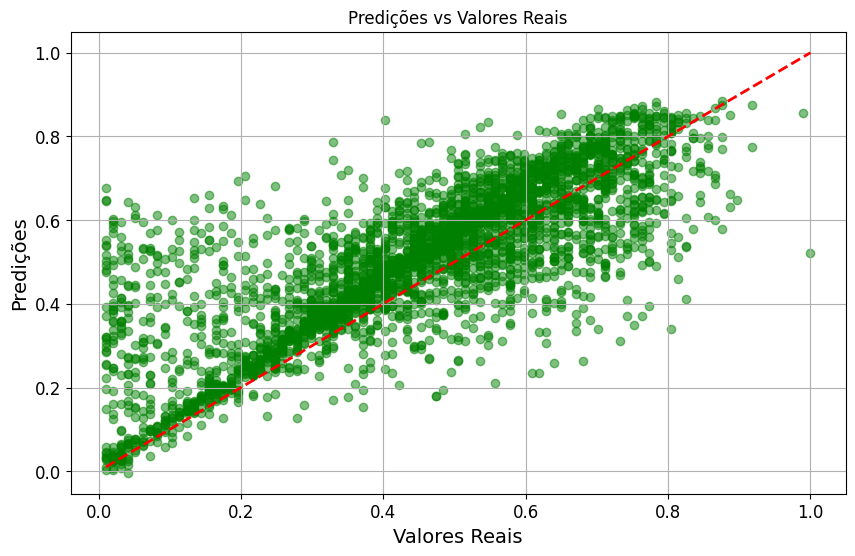

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_scatter(validation_set_cp, LightGBM_model)

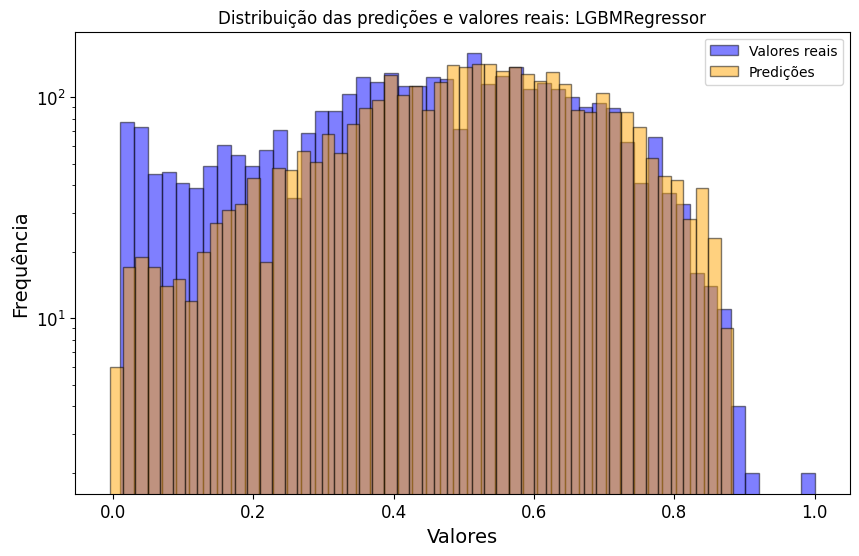

In [ ]:
plot_distribution(validation_set_cp, LightGBM_model)

## Ridge


In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, Ridge_model)

MAE: 0.10109522978840677
MSE: 0.019772512436440164
RMSE: 0.14061476606829088
R²: 0.5420983319554473
Predições do modelo: 
[0.78667844 0.41558164 0.50048696 ... 0.31217035 0.53863672 0.45862523]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, Ridge_model)

Scores: [0.12048228 0.12640151 0.12082238 0.1308639  0.13276001 0.13197005
 0.13642538 0.1251516  0.1230066  0.12909179]
Média: 0.12769755012629447
Desvio Padrão: 0.005113923197162303


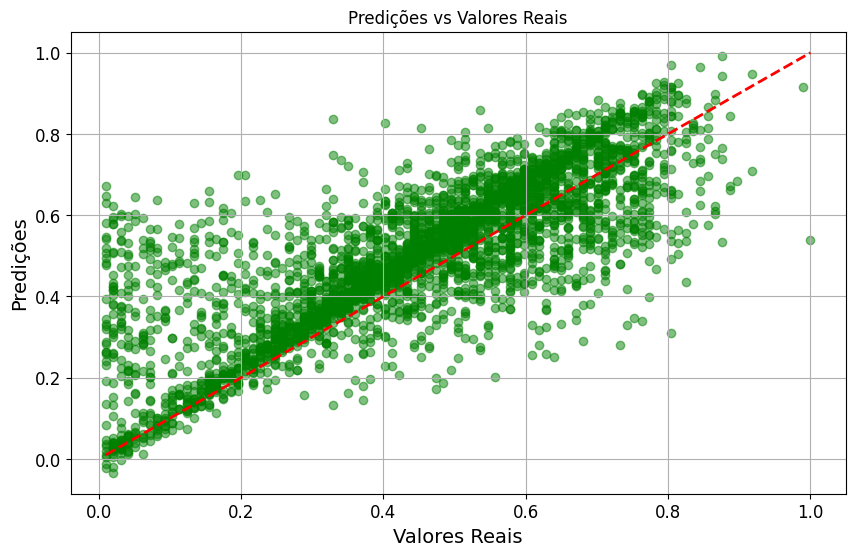

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_scatter(validation_set_cp, Ridge_model)

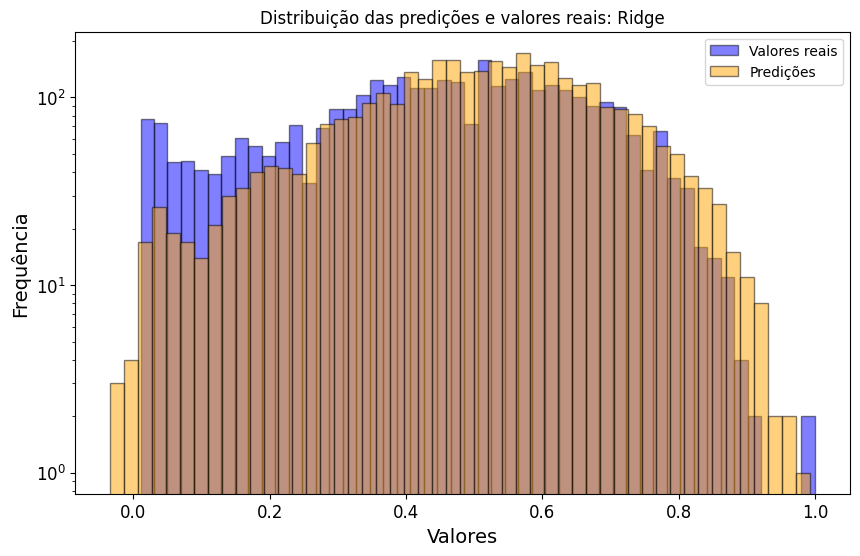

In [ ]:
plot_distribution(validation_set_cp, Ridge_model)

## Linear Regression

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, LinearRegression_model)

MAE: 0.10110256071961216
MSE: 0.019773528674557152
RMSE: 0.14061837957591872
R²: 0.5420747974081612
Predições do modelo: 
[0.78775601 0.41643792 0.49974124 ... 0.31094912 0.53801367 0.45797539]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, LinearRegression_model)

Scores: [0.12048407 0.12642551 0.12091482 0.13094931 0.13286933 0.1320518
 0.13643129 0.12520875 0.12299102 0.12914712]
Média: 0.1277473023141859
Desvio Padrão: 0.005124830660287179


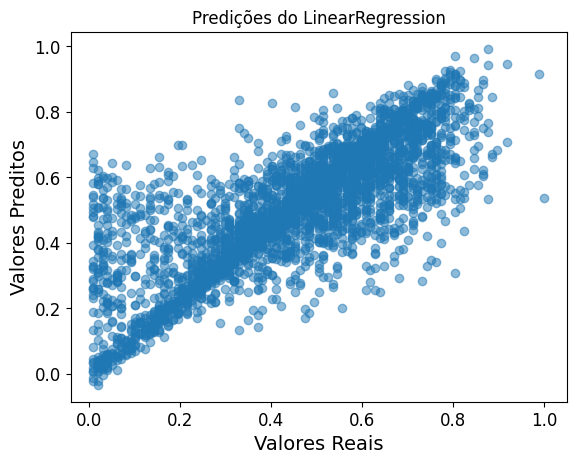

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, LinearRegression_model)

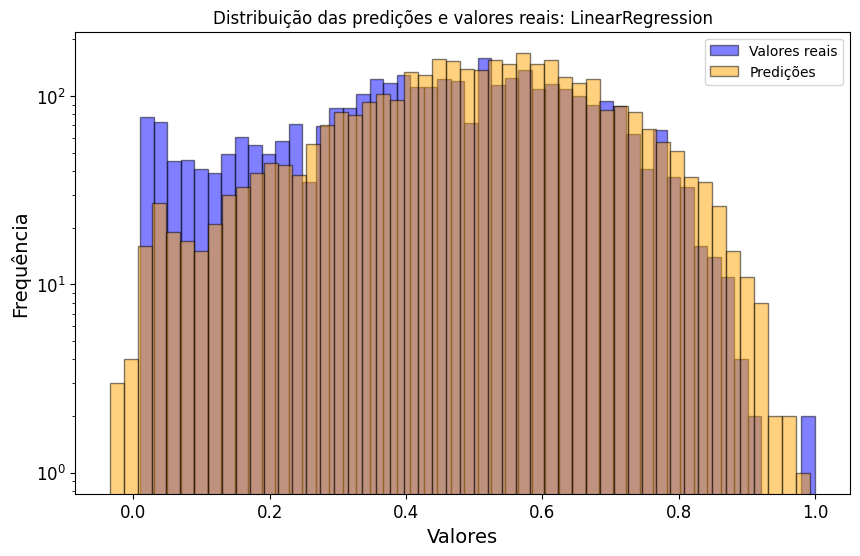

In [ ]:
plot_distribution(validation_set_cp, LinearRegression_model)

## Elastic Net

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, Elastic_net_model)

MAE: 0.10344296962584379
MSE: 0.02000089595840252
RMSE: 0.14142452389314422
R²: 0.5368093128691465
Predições do modelo: 
[0.78066063 0.42162094 0.50170567 ... 0.33377649 0.53982582 0.46121962]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, Elastic_net_model)

Scores: [0.12069972 0.12640019 0.12114467 0.13179151 0.13260083 0.13133045
 0.13639728 0.12605743 0.12312679 0.1290147 ]
Média: 0.12785635580337354
Desvio Padrão: 0.004983405982039795


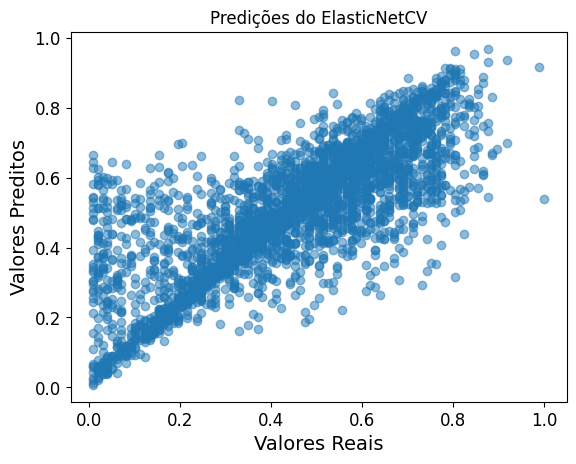

In [ ]:
plot_predictions(validation_set_cp, Elastic_net_model)

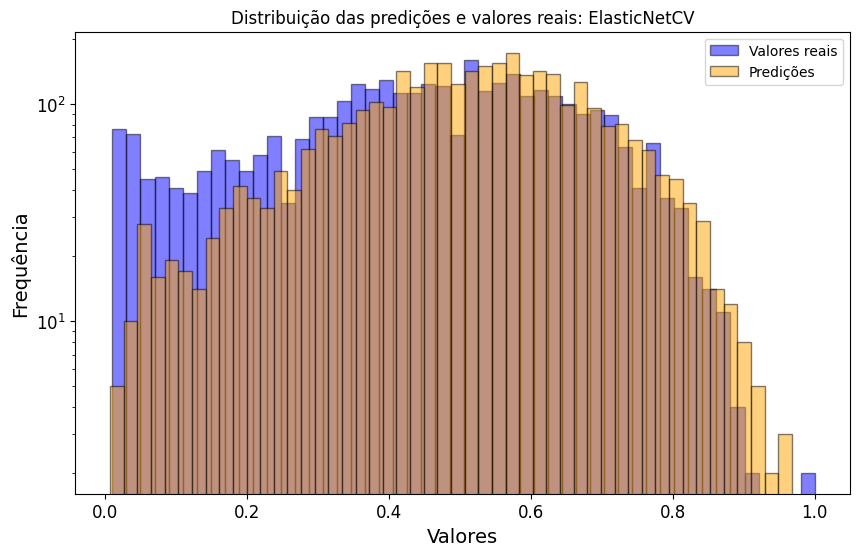

In [ ]:
plot_distribution(validation_set_cp, Elastic_net_model)

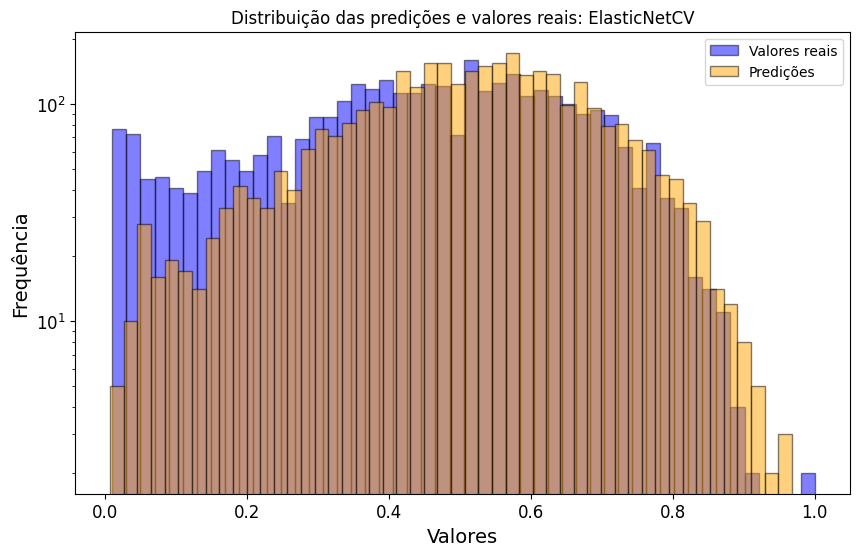

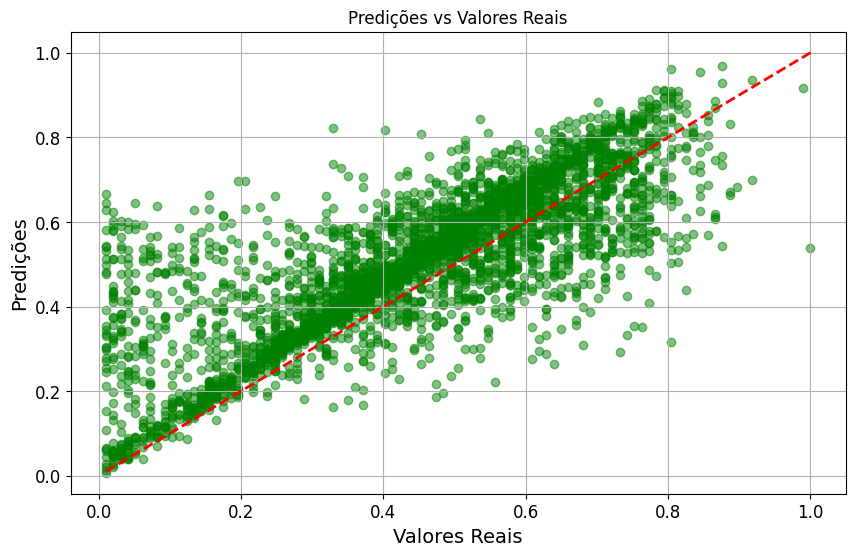

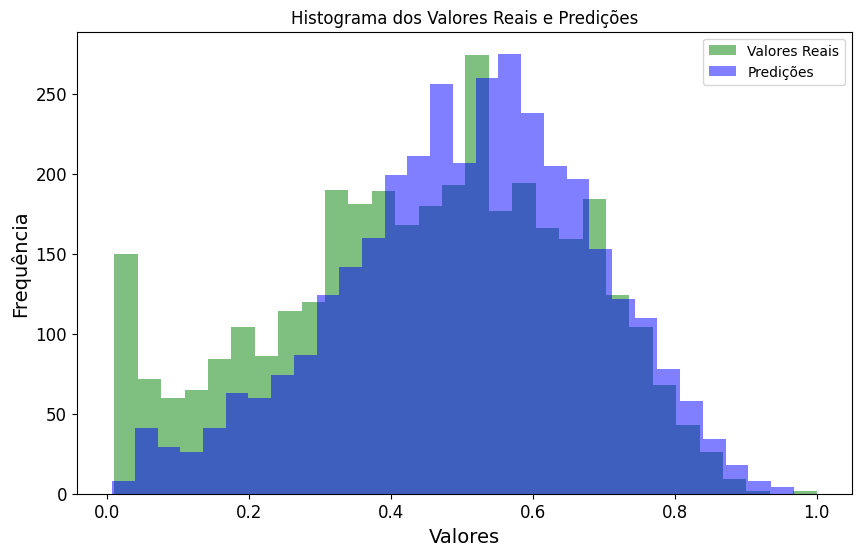

In [ ]:
plot_distribution(validation_set_cp, Elastic_net_model)

plot_scatter(validation_set_cp, Elastic_net_model)

plot_histogram(validation_set_cp, Elastic_net_model)

## Random Forest


In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(train_set_cp, RandomForest_model)

MAE: 0.07073614609209215
MSE: 0.011596695198269042
RMSE: 0.10768795289292597
R²: 0.7212153991521951
Predições do modelo: 
[0.26182189 0.25686172 0.19566124 ... 0.28352072 0.48637772 0.33185233]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, RandomForest_model)

Scores: [0.1210472  0.1319153  0.12333817 0.13493743 0.1331906  0.13286851
 0.14121047 0.12756169 0.12730787 0.12964808]
Média: 0.1303025319691309
Desvio Padrão: 0.005559349500186425


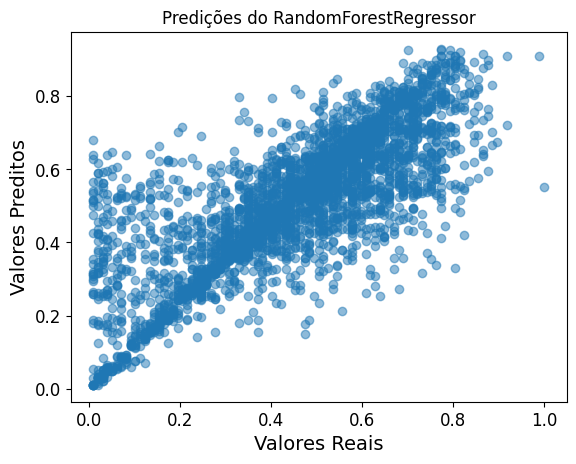

In [ ]:
# Visualizando dados: Previsão X Dados verdadeiros
plot_predictions(validation_set_cp, RandomForest_model)

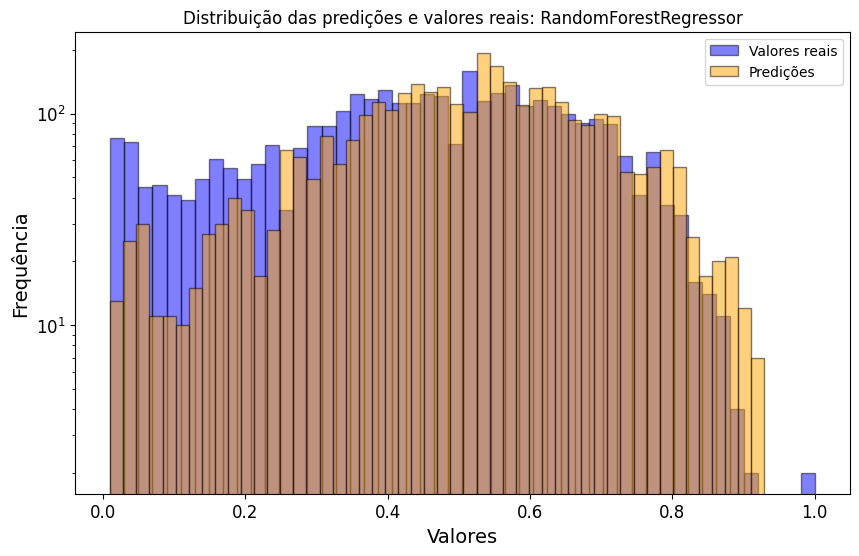

In [ ]:
plot_distribution(validation_set_cp, RandomForest_model)

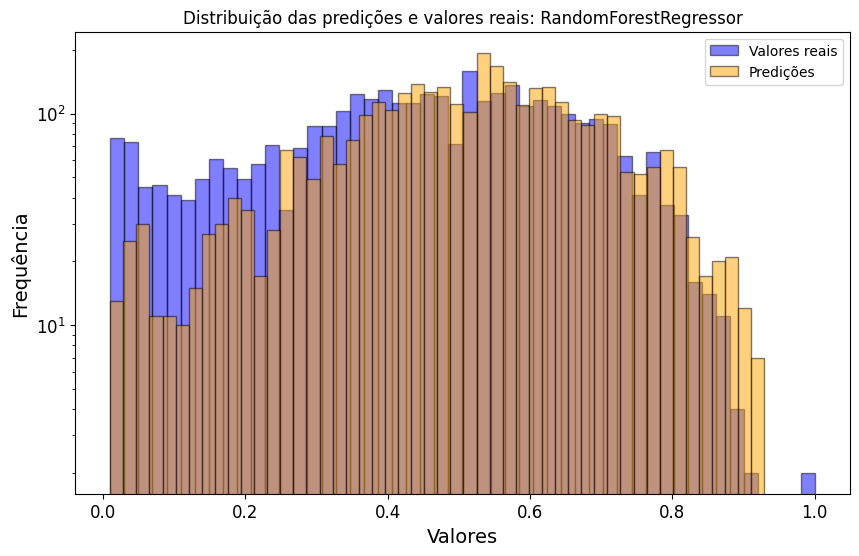

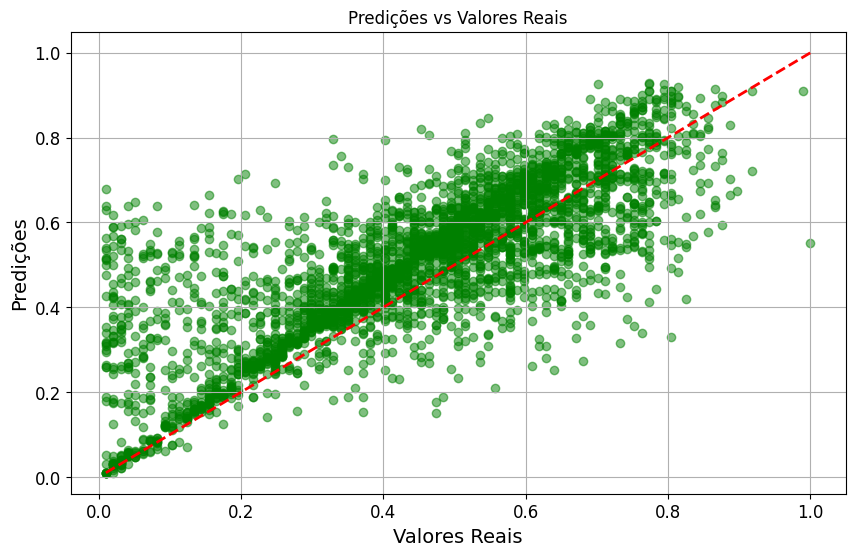

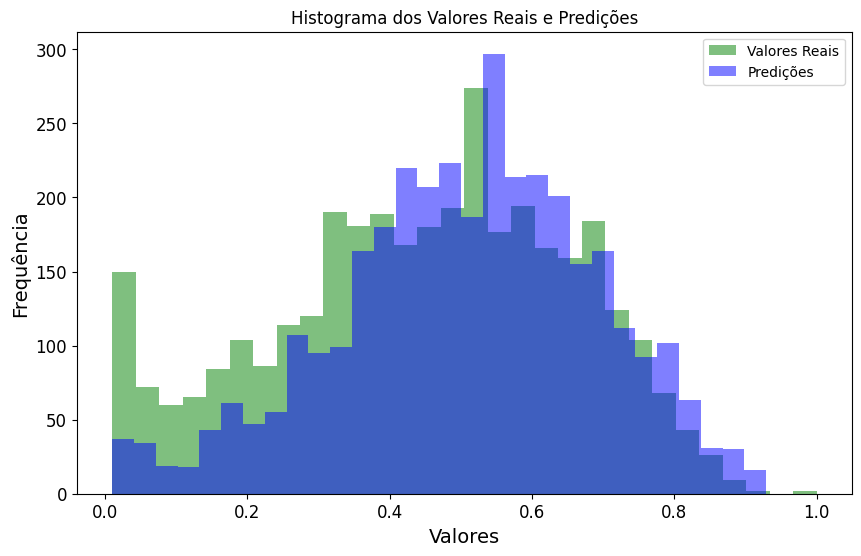

In [ ]:
plot_distribution(validation_set_cp, RandomForest_model)

plot_scatter(validation_set_cp, RandomForest_model)

plot_histogram(validation_set_cp, RandomForest_model)

## CatBooster

In [ ]:
# SEM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
evaluate_model_performance(validation_set_cp, CatBoost_model)

MAE: 0.10164178329002269
MSE: 0.019494729502553147
RMSE: 0.13962352775429057
R²: 0.5485313671698673
Predições do modelo: 
[0.7732874  0.42087317 0.50760974 ... 0.35086003 0.51637347 0.44757386]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, CatBoost_model)

Scores: [0.12125541 0.12859935 0.12125788 0.13227267 0.13247661 0.13174092
 0.13723317 0.12527742 0.1232636  0.12843835]
Média: 0.1281815377798297
Desvio Padrão: 0.005084830682222205


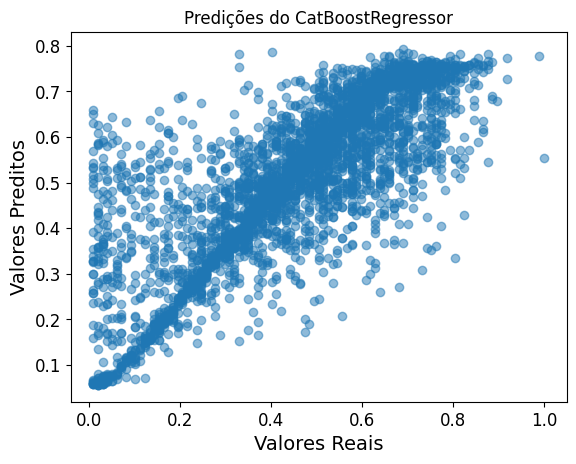

In [ ]:
plot_predictions(validation_set_cp, CatBoost_model)

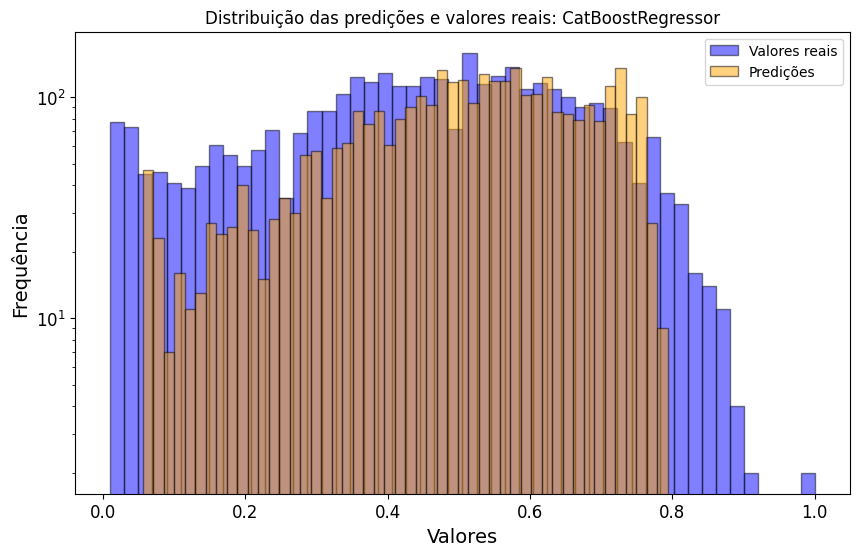

In [ ]:
plot_distribution(validation_set_cp, CatBoost_model)

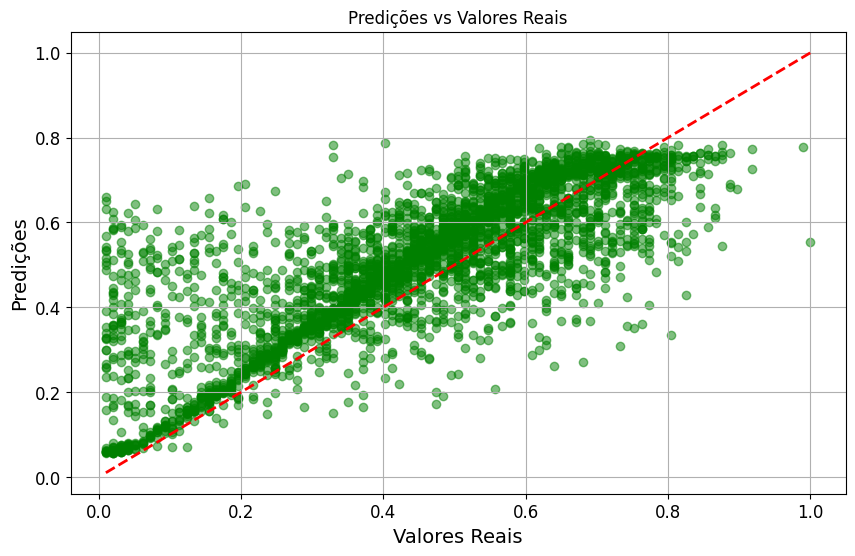

In [ ]:
plot_scatter(validation_set_cp, CatBoost_model)

# **ENSEMBLE**

In [ ]:

voting_regressor = VotingRegressor(
    estimators=[
      ('ridge', Ridge_model),
      ('catboost', CatBoost_model),
      ('random_forest', RandomForest_model),
      ('linear_regression', LinearRegression_model),
  ]
)

X_train, y_train = split_target_features(train_set_cp)
X_test, y_test = split_target_features(validation_set_cp)

voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)

# **MODELO FINAL**

In [ ]:
evaluate_model_performance(validation_set_cp, voting_regressor)

MAE: 0.10114457700424333
MSE: 0.01958566738100075
RMSE: 0.13994880271370938
R²: 0.5464253825933778
Predições do modelo: 
[0.77953767 0.41532146 0.50576041 ... 0.33195297 0.52995101 0.45728004]


In [ ]:
# COM VALIDAÇÃO CRUZADA -> Usando o conjunto de validação
cross_validation(validation_set_cp, voting_regressor)

In [ ]:
plot_scatter(validation_set_cp, voting_regressor)

In [ ]:
plot_distribution(validation_set_cp, voting_regressor)

In [ ]:
plot_histogram(validation_set_cp, voting_regressor)